Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
%%capture
!pip install category_encoders==2.*

# Working locally:
DATA_PATH = '../data/'

### Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 75)
pd.set_option("display.max_rows", 75)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder

In [3]:
def clean_up_binary_columns(cell_contents):
  if isinstance(cell_contents, str):
    return 1
  else:
    return 0

## 1. Wrangle Data

In [12]:
def wrangle(filepath):
  df = pd.read_csv(filepath) #parse_dates=['DATE'], index_col='DATE')

  # Drop Columns with a high number of NaNs
  df.dropna(axis=1, thresh=300, inplace=True)
 
  # High Cardinality Categorical Columns
  #categorical_cols = df.select_dtypes('object').columns
  #threshold = 10
  #high_card_cols = [col for col in categorical_cols if df[col].nunique() > threshold]
  #df.drop(high_card_cols, axis=1, inplace=True)
  
  #Feature engineering 
  #df['Total_fatalities'] = df['PERSONS KILLED'] + df['PEDESTRIANS KILLED'] + df['CYCLISTS KILLED'] + df['MOTORISTS KILLED']
  #df['Total_injured'] = df['PERSONS INJURED'] + df['PEDESTRIANS INJURED'] + df['CYCLISTS INJURED'] + df['MOTORISTS INJURED']
 # df['Total_victims'] = df['Total_fatalities'] + df['Total_injured']
  df['New_Borough'] = df['BOROUGH'].replace({'STATEN ISLAND':0, 'BRONX':0, 'MANHATTAN':0, 'QUEENS':1,'BROOKLYN':1})
  
  # Drop 'UNIQUE KEY' column
  df = df.drop(columns='UNIQUE KEY')
  df = df.drop(columns='BOROUGH')
  df= df.drop(columns=['TIME','ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'VEHICLE 2 TYPE', 'VEHICLE 3 TYPE', 'VEHICLE 4 TYPE', 'VEHICLE 5 TYPE',
       'VEHICLE 2 FACTOR', 'VEHICLE 3 FACTOR', 'VEHICLE 4 FACTOR', 'VEHICLE 5 FACTOR'])
  df= df.fillna(0) 
  return df

df = wrangle(DATA_PATH+'database.csv')  

print(df.shape)
df.head()

(477732, 12)


,DATE,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,VEHICLE 1 TYPE,VEHICLE 1 FACTOR,New_Borough
0,01/01/2015,0,0,0,0,0,0,0,0,SPORT UTILITY/STATION WAGON,TRAFFIC CONTROL DISREGARDED,1.0
1,01/01/2015,1,0,0,0,0,0,1,0,PASSENGER VEHICLE,ANIMALS ACTION,0.0
2,01/01/2015,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,FATIGUED/DROWSY,1.0
3,01/01/2015,0,0,0,0,0,0,0,0,BUS,LOST CONSCIOUSNESS,1.0
4,01/01/2015,0,0,0,0,0,0,0,0,UNKNOWN,UNSPECIFIED,0.0


In [13]:
df['VEHICLE 1 FACTOR'].value_counts()

UNSPECIFIED                                              235726
DRIVER INATTENTION/DISTRACTION                            69474
FAILURE TO YIELD RIGHT-OF-WAY                             21852
FATIGUED/DROWSY                                           20830
OTHER VEHICULAR                                           15745
BACKING UNSAFELY                                          14502
TURNING IMPROPERLY                                        11430
FOLLOWING TOO CLOSELY                                     10049
LOST CONSCIOUSNESS                                         8764
PRESCRIPTION MEDICATION                                    6192
TRAFFIC CONTROL DISREGARDED                                6054
DRIVER INEXPERIENCE                                        5612
PAVEMENT SLIPPERY                                          5383
PASSING OR LANE USAGE IMPROPER                             4807
UNSAFE LANE CHANGING                                       4104
OUTSIDE CAR DISTRACTION                 

In [8]:
df.columns

Index(['PERSONS INJURED', 'PERSONS KILLED', 'PEDESTRIANS INJURED',
       'PEDESTRIANS KILLED', 'CYCLISTS INJURED', 'CYCLISTS KILLED',
       'MOTORISTS INJURED', 'MOTORISTS KILLED', 'VEHICLE 1 TYPE',
       'VEHICLE 1 FACTOR', 'New_Borough'],
      dtype='object')

In [58]:
#df['BOROUGH'].value_counts()

In [6]:
# no missing values 
df.isnull().sum()

ZIP CODE               0
LATITUDE               0
LONGITUDE              0
PERSONS INJURED        0
PERSONS KILLED         0
PEDESTRIANS INJURED    0
PEDESTRIANS KILLED     0
CYCLISTS INJURED       0
CYCLISTS KILLED        0
MOTORISTS INJURED      0
MOTORISTS KILLED       0
Total_fatalities       0
Total_injured          0
Total_victims          0
New_Borough            0
dtype: int64

In [54]:
#df['New_Borough'] = df['BOROUGH'].replace({'STATEN ISLAND':0, 'BRONX':1, 'MANHATTAN':2, 'QUEENS':3,'BROOKLYN':4})

In [11]:
df.head(5)

,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,VEHICLE 1 TYPE,VEHICLE 1 FACTOR,New_Borough
DATE,,,,,,,,,,,
2015-01-01,0,0,0,0,0,0,0,0,SPORT UTILITY/STATION WAGON,TRAFFIC CONTROL DISREGARDED,1.0
2015-01-01,1,0,0,0,0,0,1,0,PASSENGER VEHICLE,ANIMALS ACTION,0.0
2015-01-01,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,FATIGUED/DROWSY,1.0
2015-01-01,0,0,0,0,0,0,0,0,BUS,LOST CONSCIOUSNESS,1.0
2015-01-01,0,0,0,0,0,0,0,0,UNKNOWN,UNSPECIFIED,0.0


## 2. Split The Data 

In [9]:
target= 'New_Borough'
y = df[target]
X = df.drop(columns= target)

In [18]:
df['DATE']. value_counts()

01/18/2015    960
03/06/2015    936
01/07/2017    887
09/30/2016    872
10/21/2016    851
             ... 
12/25/2015    321
11/01/2015    312
02/14/2016    309
02/15/2016    289
01/27/2015    188
Name: DATE, Length: 790, dtype: int64

### Cutoff

In [113]:

cutoff = '2015-12-25'
mask = X.index < cutoff

X_train, X_vt, y_train, y_vt = train_test_split(X, y, test_size=0.8)
X_train, y_train = X.loc[mask], y.loc[mask]

start_val= '2015-12-26'
end_val= '2016-06-29'
mask_val = (X.index> start_val) & (X.index < end_val)

X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5) 
X_val, y_val, = X.loc[mask_val], y.loc[mask_val]

start_test= '2016-06-30'
end_test= '2017-12-31'
mask_test = (X.index> start_test) & (X.index < end_test)

X_test, y_test = X.loc[mask_test], y.loc[mask_test]

In [96]:
X_test


,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,VEHICLE 1 TYPE,VEHICLE 1 FACTOR
DATE,,,,,,,,,,
2016-06-02,0,0,0,0,0,0,0,0,OTHER,UNSPECIFIED
2016-06-02,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,UNSPECIFIED
2016-06-02,0,0,0,0,0,0,0,0,SMALL COM VEH(4 TIRES),UNSPECIFIED
2016-06-02,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,UNSPECIFIED
2016-06-02,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,UNSPECIFIED
...,...,...,...,...,...,...,...,...,...,...
2017-02-28,0,0,0,0,0,0,0,0,SPORT UTILITY/STATION WAGON,ACCELERATOR DEFECTIVE
2017-02-28,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,UNSPECIFIED
2017-02-28,1,0,1,0,0,0,0,0,PASSENGER VEHICLE,FAILURE TO YIELD RIGHT-OF-WAY


In [79]:
X_train

,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,VEHICLE 1 TYPE,VEHICLE 1 FACTOR
DATE,,,,,,,,,,
2015-01-01,0,0,0,0,0,0,0,0,SPORT UTILITY/STATION WAGON,TRAFFIC CONTROL DISREGARDED
2015-01-01,1,0,0,0,0,0,1,0,PASSENGER VEHICLE,ANIMALS ACTION
2015-01-01,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,FATIGUED/DROWSY
2015-01-01,0,0,0,0,0,0,0,0,BUS,LOST CONSCIOUSNESS
2015-01-01,0,0,0,0,0,0,0,0,UNKNOWN,UNSPECIFIED
...,...,...,...,...,...,...,...,...,...,...
2015-06-28,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,BACKING UNSAFELY
2015-06-28,0,0,0,0,0,0,0,0,TAXI,UNSPECIFIED
2015-06-28,0,0,0,0,0,0,0,0,PASSENGER VEHICLE,UNSPECIFIED


## Establish Baseline

In [110]:
y_train.value_counts(normalize=True)

0.0    0.590051
1.0    0.409949
Name: New_Borough, dtype: float64

In [111]:
# Common class is the baseline
print("Baseline Accuracy", y_train.value_counts(normalize=True).max())

Baseline Accuracy 0.5900508670364041


## Build Model

In [114]:
# Transform our data using One-Hot Encoding
# instantiate our OneHotEncoder Class (save to a variable)
ohe = OneHotEncoder(use_cat_names=True)

# Fit our transformer to the TRAINING DATA
# During the .fit() step, OHE is learning which columns have 'object' datatype
ohe.fit(X_train)

# Creates the new columns and removes the original column
# I should have the same number of columns in both XT_train and XT_test
XT_train = ohe.transform(X_train)
XT_val= ohe.transform(X_val)
XT_test = ohe.transform(X_test)


print(XT_train.shape)
print(XT_val.shape)
print(XT_test.shape)

(214258, 74)
(111497, 74)
(149820, 74)


In [115]:
df_model = make_pipeline(OneHotEncoder(use_cat_names= True), 
                         SimpleImputer(strategy= 'mean'), 
                         StandardScaler(),
                         DecisionTreeClassifier())

df_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['VEHICLE 1 TYPE', 'VEHICLE 1 FACTOR'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [116]:
model_rf = make_pipeline(OneHotEncoder(use_cat_names= True),
                         SimpleImputer(strategy= 'mean'), 
                         StandardScaler(),
                         RandomForestClassifier())

model_rf.fit(X_train, y_train)
model_rf

C:\Users\arnel\anaconda3\envs\unit2\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['VEHICLE 1 TYPE', 'VEHICLE 1 FACTOR'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [119]:
X_val.value_counts

<bound method DataFrame.value_counts of             PERSONS INJURED  PERSONS KILLED  PEDESTRIANS INJURED  \
DATE                                                               
2015-12-27                0               0                    0   
2015-12-27                2               0                    0   
2015-12-27                0               0                    0   
2015-12-27                0               0                    0   
2015-12-27                0               0                    0   
...                     ...             ...                  ...   
2016-06-28                0               0                    0   
2016-06-28                0               0                    0   
2016-06-28                0               0                    0   
2016-06-28                0               0                    0   
2016-06-28                0               0                    0   

            PEDESTRIANS KILLED  CYCLISTS INJURED  CYCLISTS KILLED  \
DATE  

## Make sure there is no leakeage

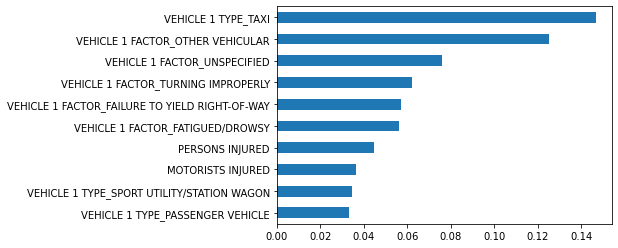

In [142]:
importances = model_rf.named_steps['randomforestclassifier'].feature_importances_
features = XT_train.columns
pd.Series(importances,index=features).abs().sort_values().tail(10).plot(kind='barh');

## Tune Model

In [129]:
model = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=50,
                           n_jobs=-1)
)

model.fit(X_train, y_train);

C:\Users\arnel\anaconda3\envs\unit2\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [130]:
print('Training Accuracy:', model.score(X_train, y_train) )
print('Validation Accuracy:',model.score(X_val, y_val) )

Training Accuracy: 0.5955576921281819
Validation Accuracy: 0.5781500847556437


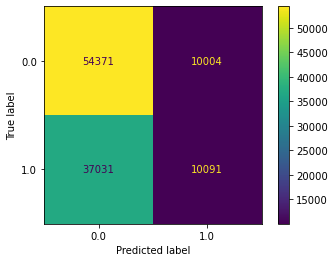

In [133]:
plot_confusion_matrix(
    model,
    X_val,
    y_val,
    values_format = '.0f')
   # display_labels = ['no repairs needed','needs repairs'])

In [134]:
print("Training Accuracy - Logistic Regression", model_lr.score(X_train, y_train))
print("Validation Accuracy - Logistic Regression", model_lr.score(X_val, y_val))

NameError: name 'model_lr' is not defined

In [135]:
print("Training Accuracy - Random Forest", model_rf.score(X_train, y_train))
print("Validation Accuracy - Random Forest", model_rf.score(X_val, y_val))

Training Accuracy - Random Forest 0.5955576921281819
Validation Accuracy - Random Forest 0.5780783339462048


In [136]:
df.corr()

,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,New_Borough
PERSONS INJURED,1.000000,0.018667,0.275958,0.002529,0.163235,0.002152,0.861593,0.025676,0.021505
PERSONS KILLED,0.018667,1.000000,0.008535,0.740585,-0.003039,0.258293,0.017109,0.605724,-0.001393
PEDESTRIANS INJURED,0.275958,0.008535,1.000000,0.014432,-0.023372,-0.001798,-0.046758,-0.003082,0.026490
PEDESTRIANS KILLED,0.002529,0.740585,0.014432,1.000000,-0.002785,-0.000216,0.000188,-0.000415,0.000070
CYCLISTS INJURED,0.163235,-0.003039,-0.023372,-0.002785,1.000000,0.001747,-0.033929,-0.002265,0.019913
CYCLISTS KILLED,0.002152,0.258293,-0.001798,-0.000216,0.001747,1.000000,0.001850,0.010510,0.001901
MOTORISTS INJURED,0.861593,0.017109,-0.046758,0.000188,-0.033929,0.001850,1.000000,0.027977,0.002900
MOTORISTS KILLED,0.025676,0.605724,-0.003082,-0.000415,-0.002265,0.010510,0.027977,1.000000,-0.003308
New_Borough,0.021505,-0.001393,0.026490,0.000070,0.019913,0.001901,0.002900,-0.003308,1.000000


In [137]:
print(classification_report(y_val, model_lr.predict(X_val)))
plot_confusion_matrix(model_lr, X_val, y_val)
plt.show()

NameError: name 'model_lr' is not defined

In [139]:
print(classification_report(y_val, model_rf.predict(X_val)))
plot_confusion_matrix(model_rf, X_val, y_val)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [111497, 149820]